In [1]:
from __future__ import print_function, division
%matplotlib inline

import numpy as np
import nsfg
import first
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import brfss
import matplotlib
import scipy

In [2]:
resp = nsfg.ReadFemResp() 

In [5]:
first_mean = resp['timesmar'].dropna().mean()
first_mean

1.3870576829859429

In [6]:
first_std = resp['timesmar'].dropna().std()
first_std

4.2971130232530834

In [7]:
second_mean = resp['jintendn'].dropna().mean()
second_mean

2.7052556818181817

In [8]:
second_std = resp ['jintendn'].dropna().std()
second_std

9.710108051456988

In [13]:
first_pdf = thinkstats2.NormalPdf(first_mean, first_std)
first_pdf.Density(first_mean + first_std)

0.056310067529003929

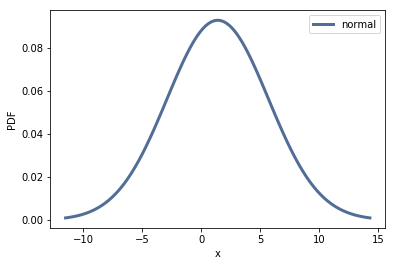

In [14]:
thinkplot.Pdf(first_pdf,label = 'normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

In [15]:
second_pdf = thinkstats2.NormalPdf(second_mean, second_std)
second_pdf.Density(second_mean + second_std)

0.024919467758428907

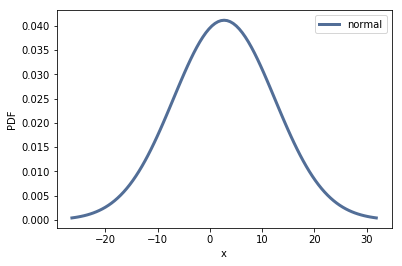

In [16]:
thinkplot.Pdf(second_pdf, label = 'normal')
thinkplot.Config(xlabel = 'x',ylabel = 'PDF')

In [ ]:
Q3 For jintendn column pdf density is 0.0249194677584289,  for timesmar column pdf density is 0.056310067529005248.

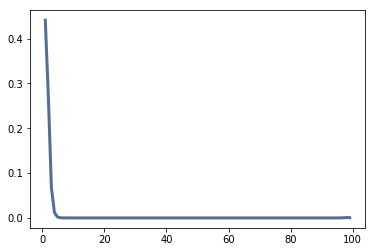

In [17]:
sample = thinkstats2.EstimatedPdf(resp['timesmar'].dropna())
thinkplot.Pdf(sample, label = 'KDE')

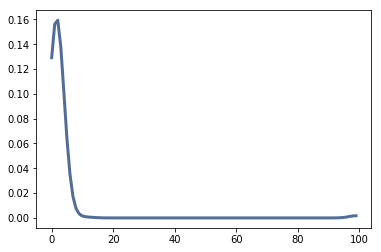

In [18]:
second_sample = thinkstats2.EstimatedPdf(resp['jintendn'].dropna())
thinkplot.Pdf(second_sample, label='KDE-2')

In [25]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def Mean(xs):
    return RawMoment(xs, 1)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    sum_list = [(x - mean)**k for x in xs]
    return sum(sum_list) / len(sum_list)
def Var(xs):
    return CentralMoment(xs, 2)

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

def Skewness(xs):
    return StandardizedMoment(xs, 3)

Skewness(resp.timesmar.dropna())


22.219307220678285

In [26]:
Skewness(resp.jintendn.dropna())

9.6869140579335831

In [32]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp



In [33]:
PearsonMedianSkewness(resp.timesmar.dropna())

0.27025442021022084

In [34]:
PearsonMedianSkewness(resp.jintendn.dropna())

0.52703684297200826

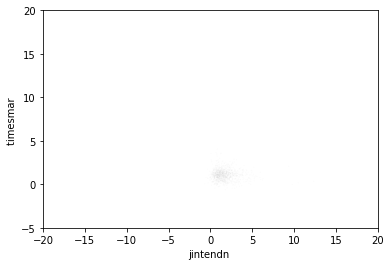

In [38]:
def Scatter_Jitter(value, jitter=0.5):
    x = len(value)
    return np.random.normal(0, jitter, x) + value
clean = resp.dropna(subset=['timesmar', 'jintendn'])

Jintendn = Scatter_Jitter(resp.jintendn)
Timesmar = Scatter_Jitter(resp.timesmar)




thinkplot.Scatter(Jintendn, Timesmar, alpha=0.01,s=2,color='black')
thinkplot.Config(xlabel='jintendn ',ylabel='timesmar ',axis=[-20, 20, -5, 20],legend=False)

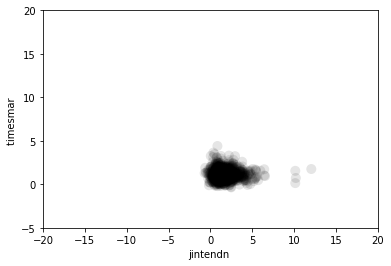

In [41]:
clean = resp.dropna(subset=['timesmar', 'jintendn'])

Jintendn = Scatter_Jitter(resp['jintendn'])
Timesmar = Scatter_Jitter(resp['timesmar])
thinkplot.Scatter(Jintendn, imesmar, alpha=0.1,s=100,color='black')
thinkplot.Config(xlabel='jintendn ',ylabel='timesmar ',axis=[-20, 20, -5, 20],legend=False)

In [42]:
bins = np.arange(100, 7650, 1)
print (bins)
indices = np.digitize(resp.timesmar, bins)
groups = resp.groupby(indices)

ts= [group.timesmar for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]

[ 100  101  102 ..., 7647 7648 7649]


In [50]:
bins = np.arange(100, 7650, 1)
print (bins)
indices = np.digitize(resp.timesmar, bins)
groups = resp.groupby(indices)

ts= [group.timesmar for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]


CustomColors = ["black","blue","yellow"]
percent = [25, 50, 75]
for i in range(len(percent)):
    weight_percentiles = [cdf.Percentile(percent[i]) for cdf in cdfs]
    label = '%dth' % percent[i]
    thinkplot.Plot(mean_heights, weight_percentiles, label=label,color=CustomColors[i])
    
thinkplot.Config(xlabel='jintendn ',ylabel='timesmar ',legend=True)

[ 100  101  102 ..., 7647 7648 7649]


MemoryError: 

The difference between Pearson's and Spearman's correlation is that the Pearson is most appropriate for measurements taken from an interval scale , while the Spearman is best for measurements taken from ordinal scales , or healthy vs non-healthy).

Both of them has 7643 rows